<a href="https://colab.research.google.com/github/Himanshu-1703/colab_notebooks/blob/main/Gradient_Boosting_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import numpy as np
import pandas as pd

# Define the data categories
fields = ['mathematics', 'physics', 'chemistry']

# Generate 20 rows of random data using numpy
np.random.seed(42)  # for reproducibility
total_marks = np.random.randint(300, 900, 100)
iq_level = np.random.randint(80, 150, 100)
years_of_experience = np.random.randint(0, 10, 100)
field = np.random.choice(fields, 100)

# Define your salary calculation formula here
base_salary = np.where(field == 'mathematics', 50000,
                       np.where(field == 'physics', 55000, 52000))
total_salary = base_salary + (years_of_experience * 2000) + (iq_level * 100)

# Create a DataFrame from the generated data using pandas
data = {
    'total_marks': total_marks,
    'iq_level': iq_level,
    'years_of_experience': years_of_experience,
    'field': field,
    'total_salary': total_salary
}
df = pd.DataFrame(data)

# Display the DataFrame
df


,total_marks,iq_level,years_of_experience,field,total_salary
0,402,86,6,mathematics,70600
1,735,91,3,physics,70100
2,570,113,8,chemistry,79300
3,406,112,0,physics,66200
4,371,127,7,physics,81700
...,...,...,...,...,...
95,678,115,4,mathematics,69500
96,789,98,6,chemistry,73800
97,530,146,0,physics,69600
98,340,98,2,physics,68800


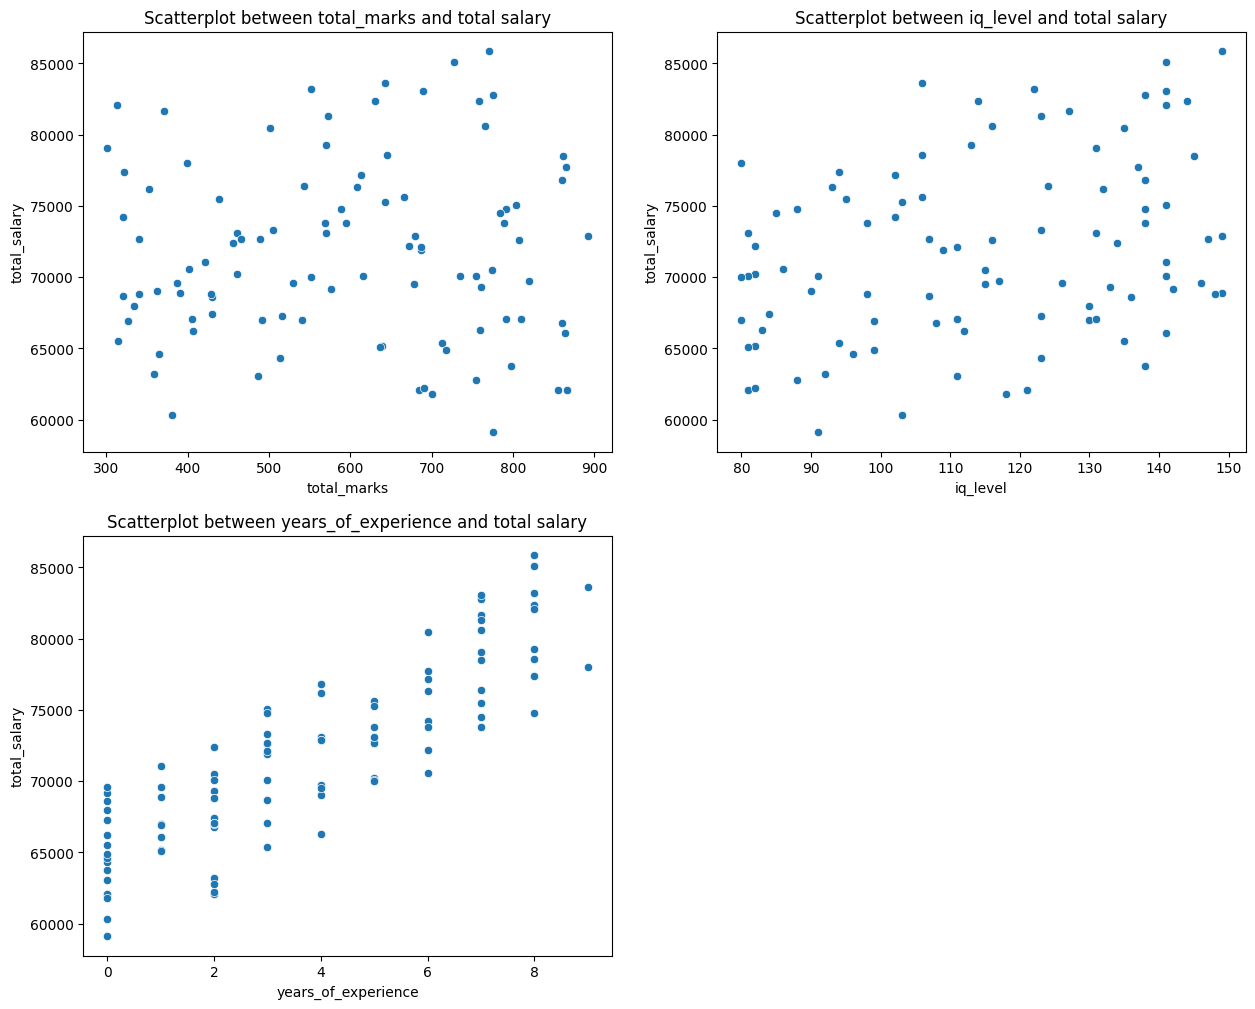

In [3]:
# draw scatter plots between input and output columns

df_num_only = df.select_dtypes(include=np.number)

fig,ax = plt.subplots(2,2,figsize=(15,12))

for ind,col in enumerate(df_num_only.columns[:-1]):
    sns.scatterplot(data=df_num_only,x=col,y='total_salary',ax=ax.flatten()[ind])
    ax.flatten()[ind].set_title(f'Scatterplot between {col} and total salary')

fig.delaxes(ax.flatten()[3])

plt.show()

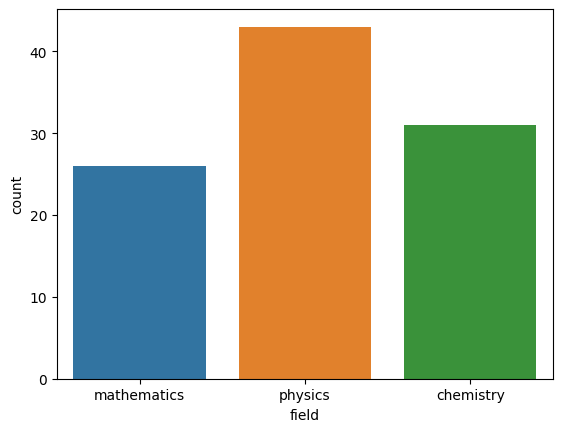

In [39]:
# distribution of categories in the field column

sns.countplot(data=df,x='field')
plt.show()

In [4]:
# split the input and target data

X = df.drop(columns=['total_salary'])
y = df['total_salary'].copy()

In [5]:
# do the train test split of the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state=42)

print('The shape of training data is',X_train.shape,y_train.shape)

print('The shape of testing data is',X_test.shape,y_test.shape)

The shape of training data is (80, 4) (80,)
The shape of testing data is (20, 4) (20,)


In [6]:
# encode the categorical column

from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()

X_train['field'] = ordinal.fit_transform(X_train[['field']])
X_test['field'] = ordinal.transform(X_test[['field']])

X_train

,total_marks,iq_level,years_of_experience,field
55,505,123,3,2.0
88,362,90,4,0.0
26,552,122,8,2.0
42,687,109,3,2.0
69,570,81,5,2.0
...,...,...,...,...
60,689,141,7,2.0
71,761,133,2,0.0
14,430,84,2,2.0
92,691,82,2,1.0


## Gradient Boosting From Scratch

In this notebook we will be building th Gradient Boost model from scratch and we will add sequential models one by one to increase our uderstanding of how this algorithm works

- The first model is the Dumb model which is actually not a Decision Tree but just the mean of the output column in case of a regression scenario. This model is called as $f_0(x)$.

In [7]:
# list to store all models

gb_models = []

### $f_0(x)$ model

In [8]:
from sklearn.metrics import r2_score

In [9]:
# save the f_0(x) model in list

f0x = np.mean(y_train)
gb_models.append(f0x)

In [10]:
gb_models

[71658.75]

In [11]:
# f_0(x) column

X_train['f0(x)'] = np.mean(y_train)

X_train

,total_marks,iq_level,years_of_experience,field,f0(x)
55,505,123,3,2.0,71658.75
88,362,90,4,0.0,71658.75
26,552,122,8,2.0,71658.75
42,687,109,3,2.0,71658.75
69,570,81,5,2.0,71658.75
...,...,...,...,...,...
60,689,141,7,2.0,71658.75
71,761,133,2,0.0,71658.75
14,430,84,2,2.0,71658.75
92,691,82,2,1.0,71658.75


**In the next step we calculate the psuedo residuals from the $f_0(x)$ predictions.**

The formula for that is

$$residuals = \sum (y_i - \bar y)$$

where $y_i$ is the actual y in the target column and $\bar y$ is the mean of the target column.

In [12]:
# calculate the residuals 1

X_train['resid_1'] = y_train - X_train['f0(x)']

X_train

,total_marks,iq_level,years_of_experience,field,f0(x),resid_1
55,505,123,3,2.0,71658.75,1641.25
88,362,90,4,0.0,71658.75,-2658.75
26,552,122,8,2.0,71658.75,11541.25
42,687,109,3,2.0,71658.75,241.25
69,570,81,5,2.0,71658.75,1441.25
...,...,...,...,...,...,...
60,689,141,7,2.0,71658.75,11441.25
71,761,133,2,0.0,71658.75,-2358.75
14,430,84,2,2.0,71658.75,-4258.75
92,691,82,2,1.0,71658.75,-9458.75


In [13]:
# r2 score of the mean model

score_0 = r2_score(y_train,X_train['f0(x)'])

score_0

0.0

For a mean line model the R2 score is always 0.

This is because the explained variance of the model is equal to 0. This means that our mean model does not require the input data to do its predictions and will always output the mean of the output column in every case.

### $f_1(x)$ model

This model is a combination of the mean model and of the DT Regressor model that is a weak learner with max_depth of 2 and trained on the X input data and the residual 1 column as the output data.

We want to minimize the mistakes or loss (residuals) of the first model sent to the next so we use this model to predict the losses which allows it to minimize the loss in the process of training.

We sequentially add the output of this DT to our previous model so that we are step by step able to reduce the loss and come closer to the actual target value.

Predictions of this DT are denoted by $h_1(x)$ and the final model that comes up is

$$f_1(x) = f_0(x) + h_1(x)$$

The $f_1(x)$ model is better than the $f_0(x)$ model in making the predictions for the output data.


In [14]:
X_train.iloc[:,0:4]

,total_marks,iq_level,years_of_experience,field
55,505,123,3,2.0
88,362,90,4,0.0
26,552,122,8,2.0
42,687,109,3,2.0
69,570,81,5,2.0
...,...,...,...,...
60,689,141,7,2.0
71,761,133,2,0.0
14,430,84,2,2.0
92,691,82,2,1.0


In [15]:
# make an object of DT regressor with max_depth = 2
from sklearn.tree import DecisionTreeRegressor

dt1 = DecisionTreeRegressor(max_depth=2)

# fit the model on the X as input and resid 1 as the output
dt1.fit(X_train.iloc[:,0:4],X_train['resid_1'])

# do predictions on the data
X_train['h1(x)'] = dt1.predict(X_train.iloc[:,0:4])

X_train

,total_marks,iq_level,years_of_experience,field,f0(x),resid_1,h1(x)
55,505,123,3,2.0,71658.75,1641.25,795.795455
88,362,90,4,0.0,71658.75,-2658.75,795.795455
26,552,122,8,2.0,71658.75,11541.25,7406.467391
42,687,109,3,2.0,71658.75,241.25,795.795455
69,570,81,5,2.0,71658.75,1441.25,795.795455
...,...,...,...,...,...,...,...
60,689,141,7,2.0,71658.75,11441.25,7406.467391
71,761,133,2,0.0,71658.75,-2358.75,-2905.416667
14,430,84,2,2.0,71658.75,-4258.75,-7213.750000
92,691,82,2,1.0,71658.75,-9458.75,-7213.750000


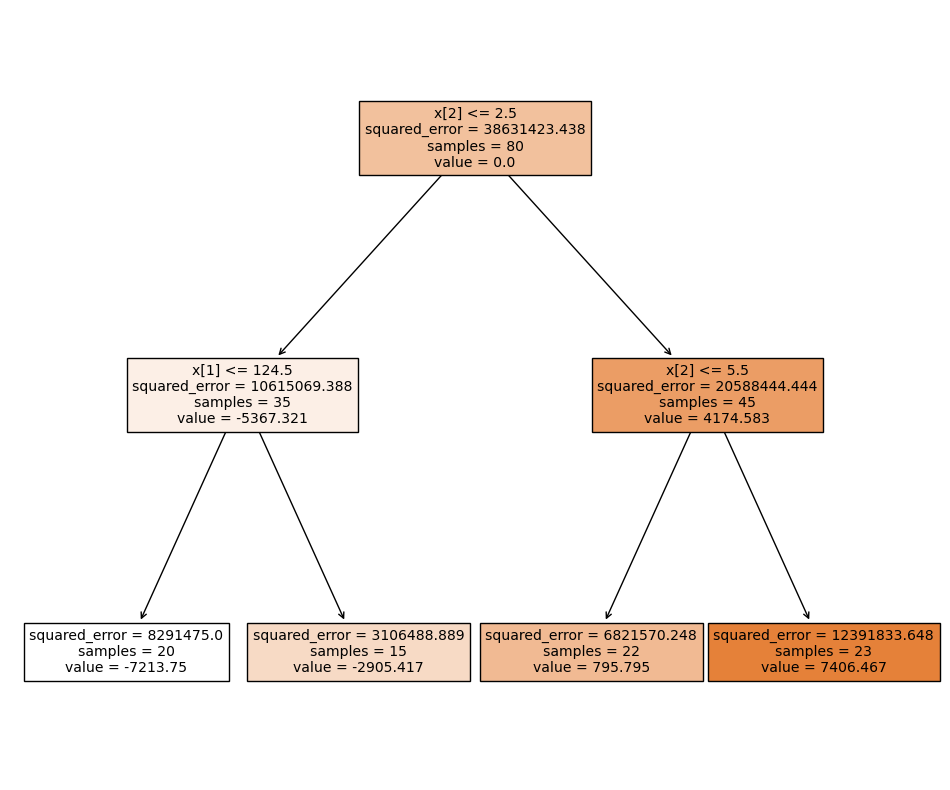

In [16]:
# visualize the tree

from sklearn.tree import plot_tree

fig = plt.figure(figsize=(12,10))

# plot the decision tree
plot_tree(dt1,filled=True)
plt.show()

In [17]:
# append the model in the model list

gb_models.append(dt1)

In [18]:
# calculate the r2 score of the model f1(x) using 0.5 learning rate

X_train['f1(x)'] = X_train['f0(x)'] + (0.5 * X_train['h1(x)'])

score_1 = r2_score(y_train,X_train['f1(x)'])

score_1

0.5928626486830797

**The r2 score of the final model increased when the two weak models got combined**.

In [19]:
X_train

,total_marks,iq_level,years_of_experience,field,f0(x),resid_1,h1(x),f1(x)
55,505,123,3,2.0,71658.75,1641.25,795.795455,72056.647727
88,362,90,4,0.0,71658.75,-2658.75,795.795455,72056.647727
26,552,122,8,2.0,71658.75,11541.25,7406.467391,75361.983696
42,687,109,3,2.0,71658.75,241.25,795.795455,72056.647727
69,570,81,5,2.0,71658.75,1441.25,795.795455,72056.647727
...,...,...,...,...,...,...,...,...
60,689,141,7,2.0,71658.75,11441.25,7406.467391,75361.983696
71,761,133,2,0.0,71658.75,-2358.75,-2905.416667,70206.041667
14,430,84,2,2.0,71658.75,-4258.75,-7213.750000,68051.875000
92,691,82,2,1.0,71658.75,-9458.75,-7213.750000,68051.875000


### $f_2(x)$ model

repeat the steps for this model.
1. Calculate the pseudo residuals(resid2) from the output of the combined model $f_1(x)$.
2. Train a second decision tree on this model using the DT regressor with max_depth = 2 taking X as the input column and resid2 as the output column.
3. Name these new predictions as $h_2(x)$.
4. Combine the previous models together with this $h_1(x)$ model to get the final output and name it as $f_2(x)$.
5. Calculate the r2 score for this model.
6. Make this the final model and do predictions on the test data and calculate the r2 scores for the predictions.

In [20]:
# calculate the residuals 2

X_train['resid_2'] = y_train - X_train['f1(x)']

X_train

,total_marks,iq_level,years_of_experience,field,f0(x),resid_1,h1(x),f1(x),resid_2
55,505,123,3,2.0,71658.75,1641.25,795.795455,72056.647727,1243.352273
88,362,90,4,0.0,71658.75,-2658.75,795.795455,72056.647727,-3056.647727
26,552,122,8,2.0,71658.75,11541.25,7406.467391,75361.983696,7838.016304
42,687,109,3,2.0,71658.75,241.25,795.795455,72056.647727,-156.647727
69,570,81,5,2.0,71658.75,1441.25,795.795455,72056.647727,1043.352273
...,...,...,...,...,...,...,...,...,...
60,689,141,7,2.0,71658.75,11441.25,7406.467391,75361.983696,7738.016304
71,761,133,2,0.0,71658.75,-2358.75,-2905.416667,70206.041667,-906.041667
14,430,84,2,2.0,71658.75,-4258.75,-7213.750000,68051.875000,-651.875000
92,691,82,2,1.0,71658.75,-9458.75,-7213.750000,68051.875000,-5851.875000


In [21]:
# make an object of DT regressor with max_depth = 2
from sklearn.tree import DecisionTreeRegressor

dt2 = DecisionTreeRegressor(max_depth=2)

# fit the model on the X as input and resid 2 as the output
dt2.fit(X_train.iloc[:,0:4],X_train['resid_2'])

# do predictions on the data
X_train['h2(x)'] = dt2.predict(X_train.iloc[:,0:4])

X_train

,total_marks,iq_level,years_of_experience,field,f0(x),resid_1,h1(x),f1(x),resid_2,h2(x)
55,505,123,3,2.0,71658.75,1641.25,795.795455,72056.647727,1243.352273,594.263181
88,362,90,4,0.0,71658.75,-2658.75,795.795455,72056.647727,-3056.647727,-2790.585571
26,552,122,8,2.0,71658.75,11541.25,7406.467391,75361.983696,7838.016304,7788.016304
42,687,109,3,2.0,71658.75,241.25,795.795455,72056.647727,-156.647727,594.263181
69,570,81,5,2.0,71658.75,1441.25,795.795455,72056.647727,1043.352273,594.263181
...,...,...,...,...,...,...,...,...,...,...
60,689,141,7,2.0,71658.75,11441.25,7406.467391,75361.983696,7738.016304,7788.016304
71,761,133,2,0.0,71658.75,-2358.75,-2905.416667,70206.041667,-906.041667,-2790.585571
14,430,84,2,2.0,71658.75,-4258.75,-7213.750000,68051.875000,-651.875000,594.263181
92,691,82,2,1.0,71658.75,-9458.75,-7213.750000,68051.875000,-5851.875000,-2790.585571


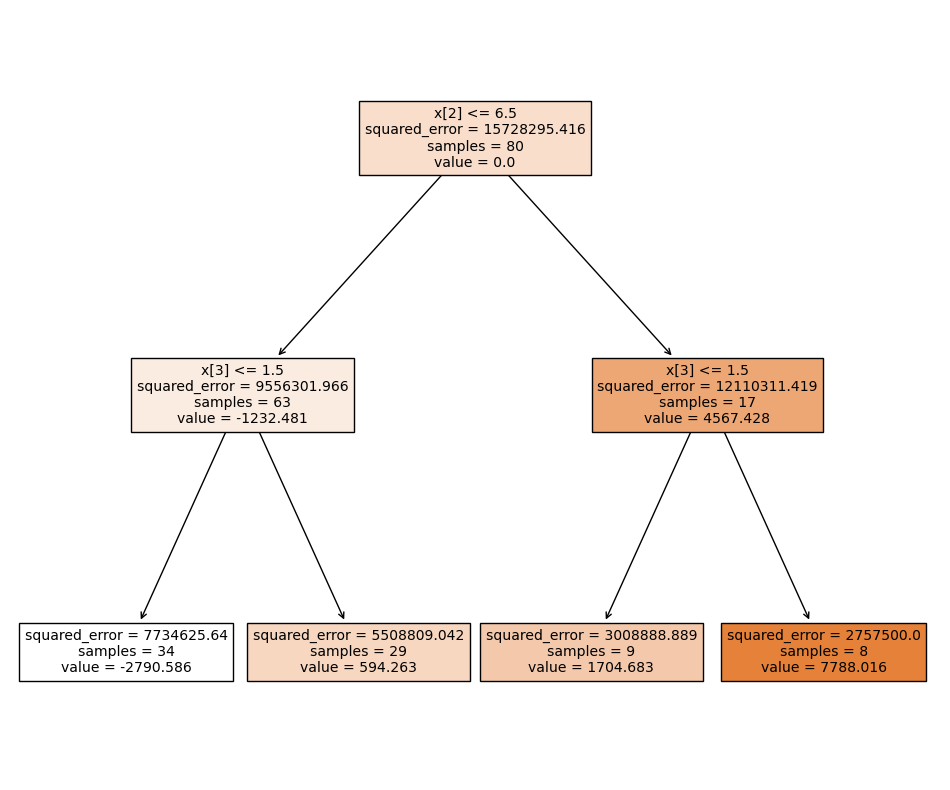

In [22]:
# visualize the tree

from sklearn.tree import plot_tree

fig = plt.figure(figsize=(12,10))

# plot the decision tree
plot_tree(dt2,filled=True)
plt.show()

In [23]:
# append the model in the model list
gb_models.append(dt2)

gb_models

[71658.75,
 DecisionTreeRegressor(max_depth=2),
 DecisionTreeRegressor(max_depth=2)]

In [24]:
# check the two models are correctly appended
dt_list = [dt1,dt2]

for ind in range(2):
    print(f'The address of model dt{ind+1} {id(dt_list[ind])} = {id(gb_models[ind+1])}')


The address of model dt1 139779267205136 = 139779267205136
The address of model dt2 139779267204416 = 139779267204416


In [25]:
# calculate the r2 score of the model f2(x) using 0.5 learning rate

X_train['f2(x)'] = X_train['f0(x)'] + (0.5 * X_train['h1(x)']) + (0.5 * X_train['h2(x)'])

score_2 = r2_score(y_train,X_train['f2(x)'])

score_2

0.7837024890187563

- We can see here that the r2 score of the model has been increased from 0.59 to 0.78.

### $f_3(x)$ model

repeat the steps for this model.
1. Calculate the pseudo residuals(resid3) from the output of the combined model $f_2(x)$.
2. Train a third decision tree on this model using the DT regressor with max_depth = 2 taking X as the input column and resid3 as the output column.
3. Name these new predictions as $h_3(x)$.
4. Combine the previous models together with this $h_3(x)$ model to get the final output and name it as $f_3(x)$.
5. Calculate the r2 score for this model.
6. Make this the final model and do predictions on the test data and calculate the r2 scores for the predictions.

In [29]:
# calculate the residuals 3

X_train['resid_3'] = y_train - X_train['f2(x)']

X_train

,total_marks,iq_level,years_of_experience,field,f0(x),resid_1,h1(x),f1(x),resid_2,h2(x),f2(x),resid_3
55,505,123,3,2.0,71658.75,1641.25,795.795455,72056.647727,1243.352273,594.263181,72353.779318,946.220682
88,362,90,4,0.0,71658.75,-2658.75,795.795455,72056.647727,-3056.647727,-2790.585571,70661.354942,-1661.354942
26,552,122,8,2.0,71658.75,11541.25,7406.467391,75361.983696,7838.016304,7788.016304,79255.991848,3944.008152
42,687,109,3,2.0,71658.75,241.25,795.795455,72056.647727,-156.647727,594.263181,72353.779318,-453.779318
69,570,81,5,2.0,71658.75,1441.25,795.795455,72056.647727,1043.352273,594.263181,72353.779318,746.220682
...,...,...,...,...,...,...,...,...,...,...,...,...
60,689,141,7,2.0,71658.75,11441.25,7406.467391,75361.983696,7738.016304,7788.016304,79255.991848,3844.008152
71,761,133,2,0.0,71658.75,-2358.75,-2905.416667,70206.041667,-906.041667,-2790.585571,68810.748881,489.251119
14,430,84,2,2.0,71658.75,-4258.75,-7213.750000,68051.875000,-651.875000,594.263181,68349.006590,-949.006590
92,691,82,2,1.0,71658.75,-9458.75,-7213.750000,68051.875000,-5851.875000,-2790.585571,66656.582214,-4456.582214


In [31]:
# make an object of DT regressor with max_depth = 2
from sklearn.tree import DecisionTreeRegressor

dt3 = DecisionTreeRegressor(max_depth=2)

# fit the model on the X as input and resid 2 as the output
dt3.fit(X_train.iloc[:,0:4],X_train['resid_3'])

# do predictions on the data
X_train['h3(x)'] = dt3.predict(X_train.iloc[:,0:4])

X_train

,total_marks,iq_level,years_of_experience,field,f0(x),resid_1,h1(x),f1(x),resid_2,h2(x),f2(x),resid_3,h3(x)
55,505,123,3,2.0,71658.75,1641.25,795.795455,72056.647727,1243.352273,594.263181,72353.779318,946.220682,2591.848662
88,362,90,4,0.0,71658.75,-2658.75,795.795455,72056.647727,-3056.647727,-2790.585571,70661.354942,-1661.354942,-485.081113
26,552,122,8,2.0,71658.75,11541.25,7406.467391,75361.983696,7838.016304,7788.016304,79255.991848,3944.008152,2591.848662
42,687,109,3,2.0,71658.75,241.25,795.795455,72056.647727,-156.647727,594.263181,72353.779318,-453.779318,2591.848662
69,570,81,5,2.0,71658.75,1441.25,795.795455,72056.647727,1043.352273,594.263181,72353.779318,746.220682,-485.081113
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,689,141,7,2.0,71658.75,11441.25,7406.467391,75361.983696,7738.016304,7788.016304,79255.991848,3844.008152,2591.848662
71,761,133,2,0.0,71658.75,-2358.75,-2905.416667,70206.041667,-906.041667,-2790.585571,68810.748881,489.251119,-1123.558853
14,430,84,2,2.0,71658.75,-4258.75,-7213.750000,68051.875000,-651.875000,594.263181,68349.006590,-949.006590,-1123.558853
92,691,82,2,1.0,71658.75,-9458.75,-7213.750000,68051.875000,-5851.875000,-2790.585571,66656.582214,-4456.582214,-1123.558853


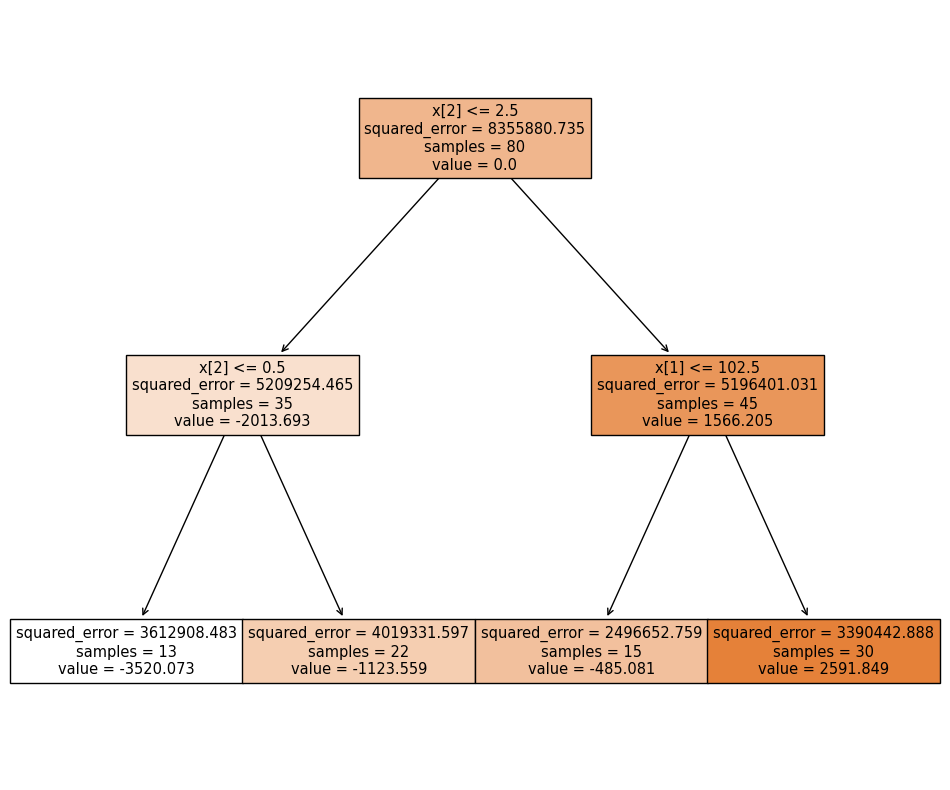

In [32]:
# visualize the tree

from sklearn.tree import plot_tree

fig = plt.figure(figsize=(12,10))

# plot the decision tree
plot_tree(dt3,filled=True)
plt.show()

In [33]:
# append the model in the model list
gb_models.append(dt3)

gb_models

[71658.75,
 DecisionTreeRegressor(max_depth=2),
 DecisionTreeRegressor(max_depth=2),
 DecisionTreeRegressor(max_depth=2)]

In [34]:
# check the three models are correctly appended
dt_list = [dt1,dt2,dt3]

for ind in range(3):
    print(f'The address of model dt{ind+1} {id(dt_list[ind])} = {id(gb_models[ind+1])}')

The address of model dt1 139779267205136 = 139779267205136
The address of model dt2 139779267204416 = 139779267204416
The address of model dt3 139779231251376 = 139779231251376


In [35]:
# calculate the r2 score of the model f2(x) using 0.5 learning rate

X_train['f3(x)'] = X_train['f0(x)'] + (0.5 * X_train['h1(x)']) + (0.5 * X_train['h2(x)']) + (0.5 * X_train['h3(x)'])

score_3 = r2_score(y_train,X_train['f3(x)'])

score_3

0.8792968524445713

- We can see here that the r2 score of the model has been increased from 0.78 to 0.88.

## Predictions on test data

Using the models saved and applying the learning rate as 0.5 we will be predicting on the test data and calculting the r2 score of our boosting algorithm.

In [36]:
X_test

,total_marks,iq_level,years_of_experience,field
83,364,96,0,2.0
53,808,116,3,2.0
70,755,81,5,0.0
45,541,80,2,2.0
44,313,141,8,0.0
39,320,107,3,0.0
22,460,131,4,0.0
80,340,147,3,0.0
10,758,144,8,0.0
0,402,86,6,1.0


In [37]:
y_pred = 0

for model in gb_models[1:]:
    dt_prediction = model.predict(X_test)
    learning_rate = 0.5
    y_pred += learning_rate * dt_prediction

y_pred = y_pred + gb_models[0]

In [38]:
# calculate the r2 score for the test data

test_score = r2_score(y_test,y_pred)

print('The r2 score for the test data is',test_score)

The r2 score for the test data is 0.8121212669187614
